<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-the-clean-dataset" data-toc-modified-id="Importing-the-clean-dataset-1">Importing the clean dataset</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-2">Question 3</a></span><ul class="toc-item"><li><span><a href="#List-of-all-unique-accounts" data-toc-modified-id="List-of-all-unique-accounts-2.1">List of all unique accounts</a></span></li><li><span><a href="#Average-Memory-Used-and-Memory-Requested-Per-Account" data-toc-modified-id="Average-Memory-Used-and-Memory-Requested-Per-Account-2.2">Average Memory Used and Memory Requested Per Account</a></span></li></ul></li><li><span><a href="#Question-4" data-toc-modified-id="Question-4-3">Question 4</a></span></li><li><span><a href="#Requested-Time" data-toc-modified-id="Requested-Time-4">Requested Time</a></span><ul class="toc-item"><li><span><a href="#Remarks" data-toc-modified-id="Remarks-4.1">Remarks</a></span></li></ul></li><li><span><a href="#Used-Time" data-toc-modified-id="Used-Time-5">Used Time</a></span></li><li><span><a href="#Used-Mb-Per-Core" data-toc-modified-id="Used-Mb-Per-Core-6">Used Mb Per Core</a></span></li><li><span><a href="#Requested-Time-vs-Used-Time" data-toc-modified-id="Requested-Time-vs-Used-Time-7">Requested Time vs Used Time</a></span></li><li><span><a href="#Requested-Memory-vs-Used-Memory" data-toc-modified-id="Requested-Memory-vs-Used-Memory-8">Requested Memory vs Used Memory</a></span></li></ul></div>

## Importing the clean dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
accre_jobs_2020 = pd.read_csv('../data/accre_jobs_2020_cleaned.csv')
accre_jobs_2020.head()

,jobid,account,user,reqtime,usedtime,nodes,cpus,partition,state,exitcode_user,exitcode_error,used_mb_per_core,reqmem_per_core,cluster_type,cluster_nodes
0,15925210,treviso,arabella,1188000,1188028,1,24,production,COMPLETED,0,0,2748.895417,5120.0,cn,1531
1,15861126,treviso,arabella,1188000,1090256,1,24,production,COMPLETED,0,0,2799.213333,5120.0,cn,1441
2,15861125,treviso,arabella,1188000,1188020,1,24,production,COMPLETED,0,0,2879.660833,5120.0,cn,1464
3,16251645,treviso,arabella,1188000,1050632,1,24,production,COMPLETED,0,0,2721.555417,5120.0,cn,1473
4,16251646,treviso,arabella,1188000,1188003,1,24,production,COMPLETED,0,0,2744.837917,5120.0,cn,1440


Let's have a quick peek at the info for this dataset

In [4]:
accre_jobs_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813160 entries, 0 to 3813159
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   jobid             object 
 1   account           object 
 2   user              object 
 3   reqtime           int64  
 4   usedtime          int64  
 5   nodes             int64  
 6   cpus              int64  
 7   partition         object 
 8   state             object 
 9   exitcode_user     int64  
 10  exitcode_error    int64  
 11  used_mb_per_core  float64
 12  reqmem_per_core   float64
 13  cluster_type      object 
 14  cluster_nodes     object 
dtypes: float64(2), int64(6), object(7)
memory usage: 436.4+ MB


---

## Question 3

**What groups are best at optimizing their memory usage in terms of percent of actual memory used of the memory requested for a job? What is the average percent for each group?**

### List of all unique accounts

In [5]:
len(accre_jobs_2020["account"].unique())

175

### Average Memory Used and Memory Requested Per Account

In [6]:
# Average memory used and Average Memory Requested Per Account
memories_df = accre_jobs_2020.groupby("account")[["used_mb_per_core", "reqmem_per_core"]].agg(np.mean)

# Percentage of Average memory used over Average Memory Requested Per Account
memories_df.loc[:, "pct_memory_used_requested"] = (memories_df.loc[:,"used_mb_per_core"] / memories_df.loc[:,"reqmem_per_core"]) * 100

# Sorting
memories_df.sort_values(by="pct_memory_used_requested", ascending=False)

,used_mb_per_core,reqmem_per_core,pct_memory_used_requested
account,,,
strawberries,11665.154821,17946.422018,64.999891
shiny,1903.599665,3280.450281,58.028609
jicama,13039.199516,22904.847784,56.927685
shell,2140.082692,3938.461538,54.338037
shallots,2918.237212,5419.165275,53.850308
roasted,9204.343160,17169.608466,53.608346
chasselas,5122.535985,9895.170303,51.768043
summer,6143.240333,12017.996718,51.117008
pinova,7802.426205,15750.099010,49.538903


We don't have enough information to classify each account into its appropriate group that it belongs to. So we are unable to calculate the average for each group. 

Let's define **best** as the top 20. The best 20 accounts are:

In [7]:
memories_df.nlargest(20, "pct_memory_used_requested")

,used_mb_per_core,reqmem_per_core,pct_memory_used_requested
account,,,
strawberries,11665.154821,17946.422018,64.999891
shiny,1903.599665,3280.450281,58.028609
jicama,13039.199516,22904.847784,56.927685
shell,2140.082692,3938.461538,54.338037
shallots,2918.237212,5419.165275,53.850308
roasted,9204.343160,17169.608466,53.608346
chasselas,5122.535985,9895.170303,51.768043
summer,6143.240333,12017.996718,51.117008
pinova,7802.426205,15750.099010,49.538903


Let's put them on a barplot

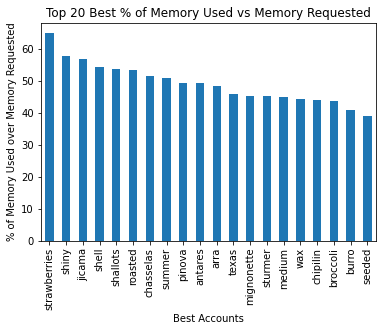

In [8]:
memories_df.nlargest(20, "pct_memory_used_requested")[["pct_memory_used_requested"]].plot(
    kind="bar", 
    legend=None,
    title="Top 20 Best % of Memory Used vs Memory Requested",
    xlabel="Best Accounts",
    ylabel="% of Memory Used over Memory Requested"
);

---

## Question 4

**Optimizing memory is more important for longer running jobs then shorter running jobs as the resources are tied up for longer. If jobs are weighted by runtime, what is the average percent of memory used of the requested memory for each group?**

- Optimizing memory = `used_mb_per_core` should be as little as possible
- We are focusing on longer running jobs: `usedtime`
- Weighted by runtime: `usedtime`
- Average % of memory used 

- What do we want to do? -- We want to optimize memory
- What is the population concerned? -- Longer running jobs
  - What defines a "longer running job"?
  - Define a demarcation line
- How to analyze?
  - Weight jobs by their runtime (`usedtime`)
  - What is the proportion of (memory used) / (requested memory)?

Weighted Average:

- Focus on Production only
- Create a new column: `memory_used_percent`

$$MemoryUsedPercent = \frac{MemoryUsed}{MemoryRequested} \times 100$$

- What is the average `memory_used_percent` for each group of nodelist?




In [9]:
# Multiply by each weight (runtime) x percentage total, then and divide by the sum of the runtime

## Requested Time

In [10]:
accre_jobs_2020[['reqtime']].describe()

,reqtime
count,3.813160e+06
mean,1.166594e+05
std,1.415580e+05
min,6.000000e+01
25%,1.440000e+04
50%,8.640000e+04
75%,1.728000e+05
max,3.150000e+07


- **Range**: `[6 ... 3.15e7]`
- **IQR**: `[1.44e4 ... 1.728e5]`

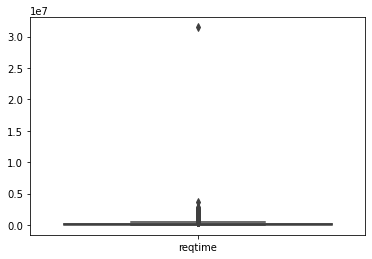

In [11]:
sns.boxplot(data=accre_jobs_2020[['reqtime']]);

**Which one is that one way out of the norm?**

In [12]:
accre_jobs_2020[accre_jobs_2020["reqtime"] > 3e7]

,jobid,account,user,reqtime,usedtime,nodes,cpus,partition,state,exitcode_user,exitcode_error,used_mb_per_core,reqmem_per_core,cluster_type,cluster_nodes
2320217,21233031,golden,luis,31500000,3373732,1,1,cgw-rocksteady,CANCELLED,0,0,0.0,4096.0,generic,rocksteady


Looks like this computer was assigned but was left on running for a long time without doing anything. It requested 365 days and was left on running for 39.05 days. 

**Let's exclude this one from our analysis of the Requested Time**

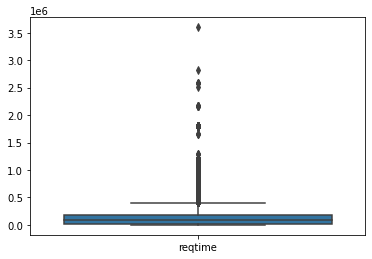

In [13]:
data_requested_time = accre_jobs_2020[accre_jobs_2020["jobid"] != "21233031"][["reqtime"]]
sns.boxplot(data=data_requested_time);

**What if we just exclude all the possible outliers aside?**

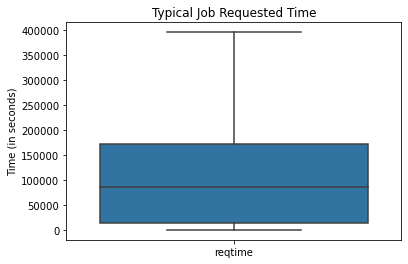

In [14]:
data_requested_time_outliers = accre_jobs_2020[accre_jobs_2020["reqtime"] > 4e5]
data_requested_time_typical = accre_jobs_2020[np.logical_not(accre_jobs_2020.isin(data_requested_time_outliers))]

sns.boxplot(data=data_requested_time_typical[["reqtime"]]).set(
    title="Typical Job Requested Time",
    ylabel="Time (in seconds)"
);

**What if we just look at the outliers by themselves?**

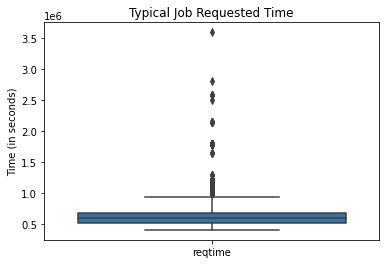

In [15]:
# Excluding that very untypical one
data_requested_time_outliers = data_requested_time_outliers[data_requested_time_outliers["reqtime"] < 3e7]

sns.boxplot(data=data_requested_time_outliers[["reqtime"]]).set(
    title="Typical Job Requested Time",
    ylabel="Time (in seconds)"
);

### Remarks

There are a lot of jobs that are taking more than 400,000s (More than 4 days) but those can be considered outliers. The typical jobs takes between 14,400s (4 hours) and 172,800s (2 days)

## Used Time

In [16]:
accre_jobs_2020[['usedtime']].describe()

,usedtime
count,3.813160e+06
mean,1.443223e+04
std,4.438099e+04
min,0.000000e+00
25%,1.300000e+02
50%,1.278000e+03
75%,8.896000e+03
max,3.373732e+06


- **Range**: `[0 ... 3.374e6]`
- **IQR**: `[1.3e2 ... 8.896e3]`

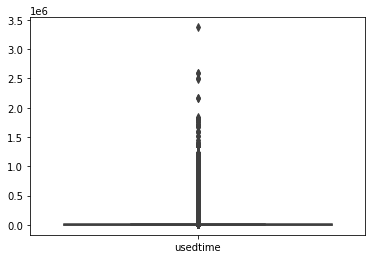

In [17]:
sns.boxplot(data=accre_jobs_2020[['usedtime']]);

## Used Mb Per Core

In [18]:
accre_jobs_2020[['used_mb_per_core']].describe()

,used_mb_per_core
count,3.813160e+06
mean,1.685980e+03
std,2.879501e+03
min,0.000000e+00
25%,1.140833e+00
50%,4.848900e+02
75%,1.922430e+03
max,2.047998e+05


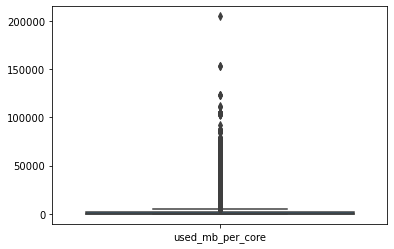

In [19]:
sns.boxplot(data=accre_jobs_2020[['used_mb_per_core']]);

## Requested Time vs Used Time

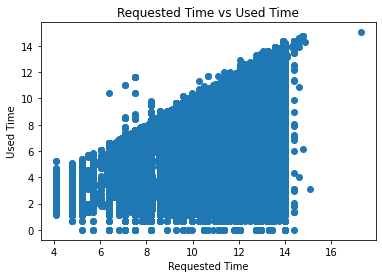

In [20]:
plt.scatter(accre_jobs_2020[['reqtime']].apply(np.log), accre_jobs_2020[['usedtime']].apply(np.log))
plt.xlabel("Requested Time")
plt.ylabel("Used Time")
plt.title("Requested Time vs Used Time");

## Requested Memory vs Used Memory

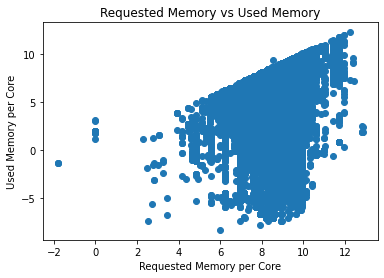

In [21]:
plt.scatter(accre_jobs_2020[['reqmem_per_core']].apply(np.log), accre_jobs_2020[['used_mb_per_core']].apply(np.log))
plt.xlabel("Requested Memory per Core")
plt.ylabel("Used Memory per Core")
plt.title("Requested Memory vs Used Memory");